In [1]:
liked_books = ["4408", "31147619", "29983711", "9401317", "9317691", "8153988", "20494944"]

In [2]:
%alias head powershell -command "& {Get-Content %s -Head 10}"
%head book_id_map.csv

book_id_csv,book_id
0,34684622
1,34536488
2,34017076
3,71730
4,30422361
5,33503613
6,33517540
7,34467031
8,6383669


In [3]:
def show_image(val):
    return '<a href="{}"><img src="{}" width=50></img></a>'.format(val, val)

In [4]:
csv_book_mapping = {}

with open("book_id_map.csv", "r") as f:
    while True:
        line = f.readline()
        if not line:
            break
        csv_id, book_id = line.strip().split(",")
        csv_book_mapping[csv_id] = book_id

In [5]:
csv_book_mapping['0']

'34684622'

In [6]:
overlap_users = set()

with open("interactions.csv", 'r') as f:
    while True:
        line = f.readline()
        if not line:
            break
        user_id, csv_id, _, rating, _ = line.split(",")
        
        if user_id in overlap_users:
            continue

        try:
            rating = int(rating)
        except ValueError:
            continue
        
        book_id = csv_book_mapping[csv_id]
        
        if book_id in liked_books and rating >= 4:
                overlap_users.add(user_id)

In [7]:
rec_lines = []

with open("interactions.csv", 'r') as f:
    while True:
        line = f.readline()
        if not line:
            break
        user_id, csv_id, _, rating, _ = line.split(",")
        
        if user_id in overlap_users:
            book_id = csv_book_mapping[csv_id]
            rec_lines.append([user_id, book_id, rating])

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

recs = pd.DataFrame(rec_lines, columns=["user_id", "book_id", "rating"])
# gr = recs[['book_id','rating']]
gr = pd.DataFrame(recs.head(100))
# gr.plot.scatter(x = "book_id", y = "rating")
# plt.show()

In [9]:
# gr['book_id']=gr['book_id'].astype(float)
# gr['user_id']=gr['user_id'].astype(float)
# gr['rating']=gr['rating'].astype(float)

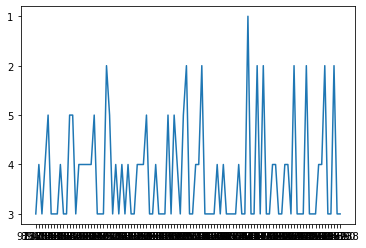

<Figure size 3600x3600 with 0 Axes>

In [10]:
# x=gr['book_id']
# y=gr['rating']
from matplotlib.pyplot import figure
gr_set = set(gr['user_id'])

plt.figure()
for user in gr_set:
     selected_data = gr.loc[gr['user_id'] == user]
     plt.plot(selected_data['book_id'], selected_data['rating'])

figure(figsize=(50,50))     
plt.show()
# gr.plot(x, y, 'g', label='Line y')
# gr[-15:].plot(x=['book_id'], y='rating', kind='multiline', figsize=(10,5), grid=True)

In [11]:
recs["book_id"] = recs["book_id"].astype(str)

In [12]:
recs

,user_id,book_id,rating
0,284,977284,3
1,284,890054,4
2,284,837153,3
3,284,1586480,4
4,284,41814,5
...,...,...,...
1530252,873216,127455,0
1530253,873216,10365343,0
1530254,873216,16131077,0
1530255,873216,18781576,0


In [13]:
top_recs = recs["book_id"].value_counts().head(10)

In [14]:
top_recs = top_recs.index.values

In [15]:
books_titles = pd.read_json("books_titles.json")
books_titles["book_id"] = books_titles["book_id"].astype(str)

In [16]:
books_titles[books_titles["book_id"].isin(top_recs)].style.format({'cover_image': show_image})

,book_id,title,ratings,cover_image,mod_title
53027,77203,The Kite Runner,1848782,,the kite runner
284473,2767052,"The Hunger Games (The Hunger Games, #1)",4899965,,the hunger games the hunger games 1
401395,5107,The Catcher in the Rye,2086945,,the catcher in the rye
463463,4671,The Great Gatsby,2758812,,the great gatsby
615314,5470,1984,2023937,,1984
757376,38447,The Handmaid's Tale,648783,,the handmaids tale
790927,2657,To Kill a Mockingbird,3255518,,to kill a mockingbird
878151,18143977,All the Light We Cannot See,498685,,all the light we cannot see
878545,3,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",4765497,,harry potter and the sorcerers stone harry potter 1
1062354,29983711,Pachinko,8161,,pachinko


In [17]:
all_recs = recs["book_id"].value_counts()

In [18]:
all_recs = all_recs.to_frame().reset_index()
all_recs.columns = ["book_id", "book_count"]

In [19]:
all_recs.head(5)

,book_id,book_count
0,2767052,1092
1,29983711,1089
2,2657,1074
3,3,1048
4,4671,1028


In [20]:
all_recs = all_recs.merge(books_titles, how="inner", on="book_id")

In [21]:
all_recs["score"] = all_recs["book_count"] * (all_recs["book_count"] / all_recs["ratings"])

In [22]:
all_recs.sort_values("score", ascending=False).head(10).style.format({'cover_image': show_image})

,book_id,book_count,title,ratings,cover_image,mod_title,score
1,29983711,1089,Pachinko,8161,,pachinko,145.315648
238,4408,327,East of Eden,3447,,east of eden,31.020888
724,9317691,175,"The Name of the Wind (The Kingkiller Chronicle, #1)",1043,,the name of the wind the kingkiller chronicle 1,29.362416
236,32920226,328,"Sing, Unburied, Sing",4592,,sing unburied sing,23.428571
216,30753987,342,The Leavers,5602,,the leavers,20.878972
7617,26856502,27,"Vengeful (Villains, #2)",35,,vengeful villains 2,20.828571
1287,31147619,118,Homegoing,697,,homegoing,19.977044
5517,34927828,37,The Great Alone,70,,the great alone,19.557143
249,8153988,322,"The Eye of the World (Wheel of Time, #1)",5740,,the eye of the world wheel of time 1,18.063415
6011,35099035,34,Red Clocks,67,,red clocks,17.253731


In [23]:
def show_image(val):
    return '<a href="{}"><img src="{}" width=50></img></a>'.format(val, val)

all_recs[all_recs["book_count"] > 200].sort_values("score", ascending=False).head(10).style.format({'cover_image': show_image})

,book_id,book_count,title,ratings,cover_image,mod_title,score
1,29983711,1089,Pachinko,8161,,pachinko,145.315648
238,4408,327,East of Eden,3447,,east of eden,31.020888
236,32920226,328,"Sing, Unburied, Sing",4592,,sing unburied sing,23.428571
216,30753987,342,The Leavers,5602,,the leavers,20.878972
249,8153988,322,"The Eye of the World (Wheel of Time, #1)",5740,,the eye of the world wheel of time 1,18.063415
441,33253215,236,The Heart's Invisible Furies,3629,,the hearts invisible furies,15.347479
71,30688435,533,Exit West,21378,,exit west,13.288848
251,32283423,321,American War,7776,,american war,13.251157
228,26025588,335,Behold the Dreamers,8793,,behold the dreamers,12.762993
345,17912498,266,The Queen of the Night,6115,,the queen of the night,11.570891


In [24]:
popular_recs = all_recs[all_recs["book_count"] > 200].sort_values("score", ascending=False)

In [25]:
def show_image(val):
    return '<a href="{}"><img src="{}" width=50></img></a>'.format(val, val)


popular_recs[~popular_recs["book_id"].isin(liked_books)].head(10).style.format({'cover_image': show_image})

,book_id,book_count,title,ratings,cover_image,mod_title,score
236,32920226,328,"Sing, Unburied, Sing",4592,,sing unburied sing,23.428571
216,30753987,342,The Leavers,5602,,the leavers,20.878972
441,33253215,236,The Heart's Invisible Furies,3629,,the hearts invisible furies,15.347479
71,30688435,533,Exit West,21378,,exit west,13.288848
251,32283423,321,American War,7776,,american war,13.251157
228,26025588,335,Behold the Dreamers,8793,,behold the dreamers,12.762993
345,17912498,266,The Queen of the Night,6115,,the queen of the night,11.570891
325,28114515,276,The Wangs vs. the World,7044,,the wangs vs the world,10.814310
108,34273236,459,Little Fires Everywhere,21135,,little fires everywhere,9.968346
104,28815371,467,The Mothers,22346,,the mothers,9.759644


In [26]:
len(overlap_users)

2029

In [27]:
len(rec_lines)

1530257